In [45]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [46]:
df = pd.read_csv("Extra_Expanded_Consistent_Student_Demographics.csv")
print(df.head())
print(df.shape)
print(df.info())

   Student_ID          Name  Gender    District  Schooling_Type  \
0           1   Farhan Raza    Male  Rawalpindi         Private   
1           2    Sana Iqbal  Female      Lahore         Madrasa   
2           3   Bushra Butt  Female   Islamabad          Public   
3           4  Kamran Malik    Male  Faisalabad  Home Schooling   
4           5    Adeel Shah    Male    Peshawar         Madrasa   

  Internet_Access Parental_Education_Level Scholarship_Status  \
0             Yes             Intermediate                 No   
1             Yes                      PhD                 No   
2             Yes                   Matric                Yes   
3              No                  Primary                Yes   
4             Yes             Intermediate                 No   

  Extracurricular_Participation Residence_Type  ...    Transport_Mode  \
0                           NaN          Urban  ...        School Bus   
1                Volunteer Work          Urban  ...        S

In [47]:
df.describe()

,Student_ID,Attendance_Percentage,Study_Hours_per_Week,CGPA,Assignment_Average,Quiz_Average,Mid_Marks,Final_Marks
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,78.025000,15.82600,3.019580,70.046660,65.546690,69.988000,70.160000
std,288.819436,13.518696,8.29485,0.592691,14.366377,14.546743,17.778693,17.917071
min,1.000000,55.000000,2.00000,2.000000,45.030000,40.080000,40.000000,40.000000
25%,250.750000,66.000000,9.00000,2.490000,57.855000,52.922500,55.000000,55.000000
50%,500.500000,78.000000,16.00000,3.020000,69.900000,66.330000,69.500000,70.000000
75%,750.250000,90.000000,23.00000,3.540000,82.415000,78.455000,85.000000,86.000000
max,1000.000000,100.000000,30.00000,4.000000,94.790000,89.960000,100.000000,100.000000


In [48]:
df.isnull().sum()

Student_ID                         0
Name                               0
Gender                             0
District                           0
Schooling_Type                     0
Internet_Access                    0
Parental_Education_Level           0
Scholarship_Status                 0
Extracurricular_Participation    160
Residence_Type                     0
School_Medium                      0
Education_System                   0
Transport_Mode                     0
Attendance_Percentage              0
Study_Hours_per_Week               0
CGPA                               0
Assignment_Average                 0
Quiz_Average                       0
Mid_Marks                          0
Final_Marks                        0
Final_Exam_Status                  0
Submission_Date                    0
dtype: int64

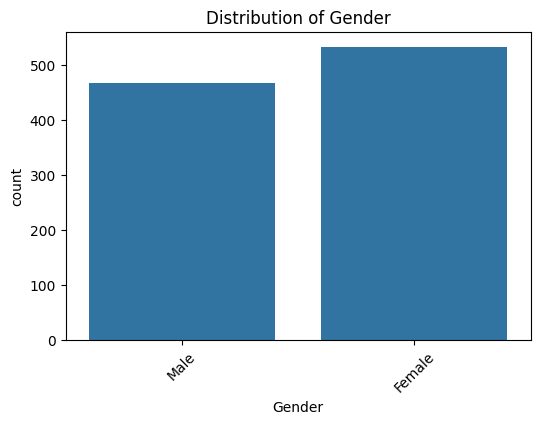

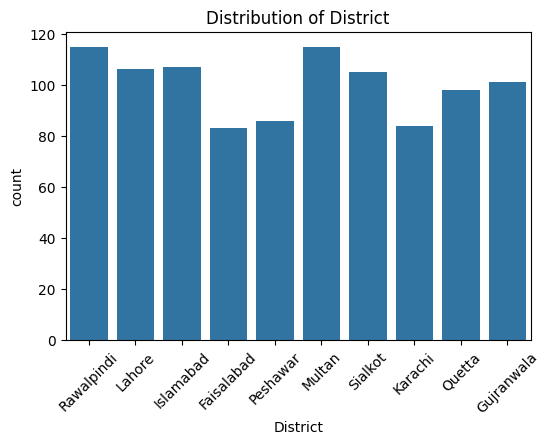

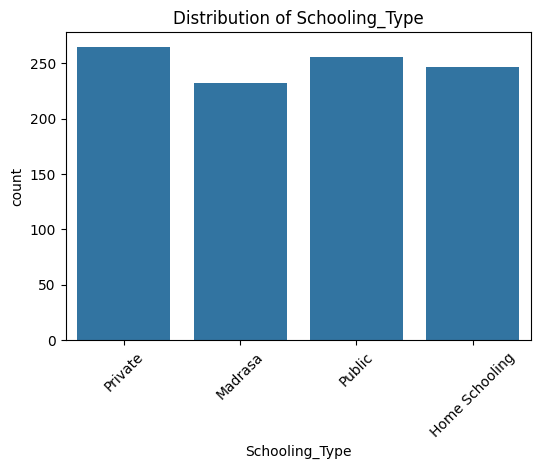

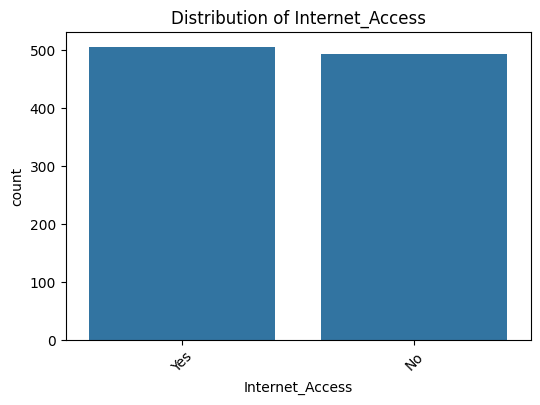

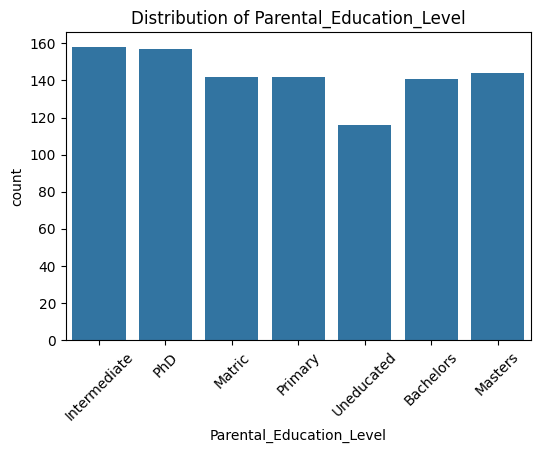

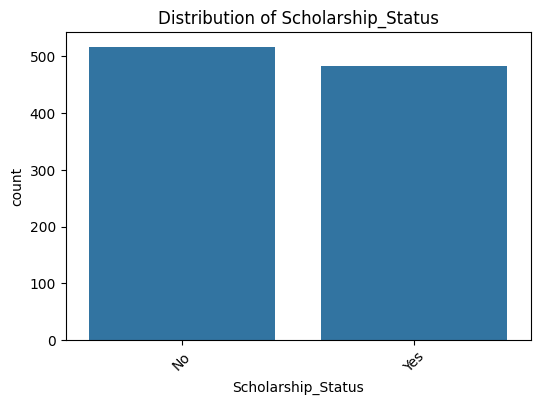

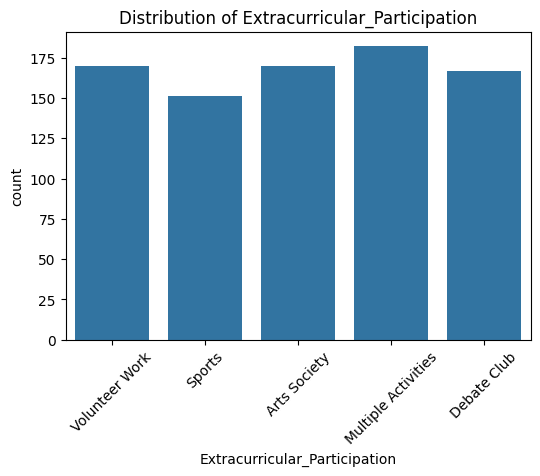

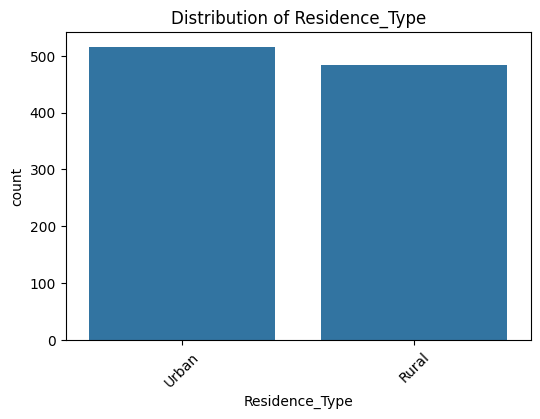

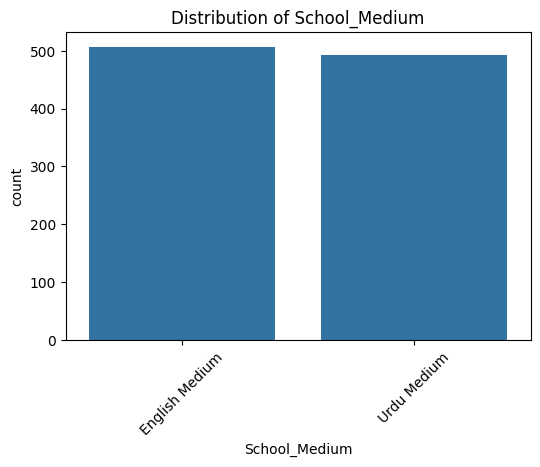

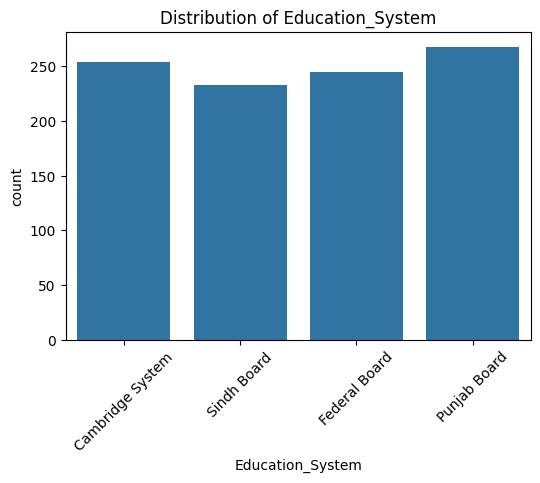

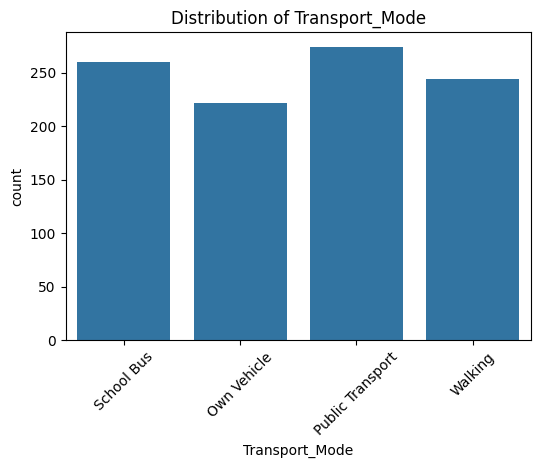

In [49]:
categorical_cols = [
'Gender','District','Schooling_Type','Internet_Access',
'Parental_Education_Level','Scholarship_Status',
'Extracurricular_Participation','Residence_Type',
'School_Medium','Education_System','Transport_Mode'
]


for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

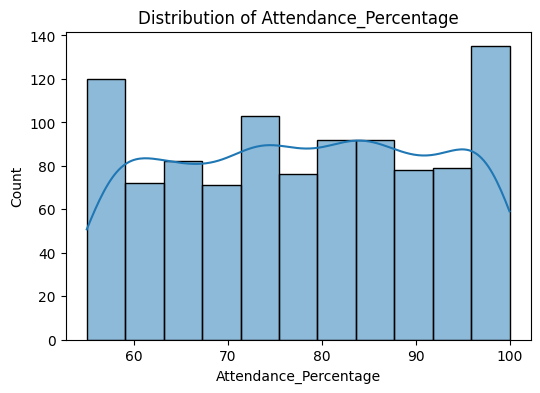

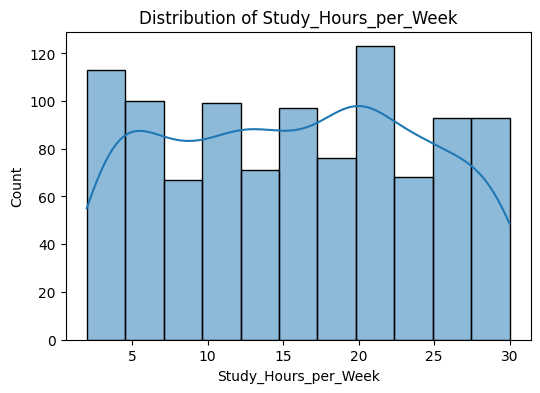

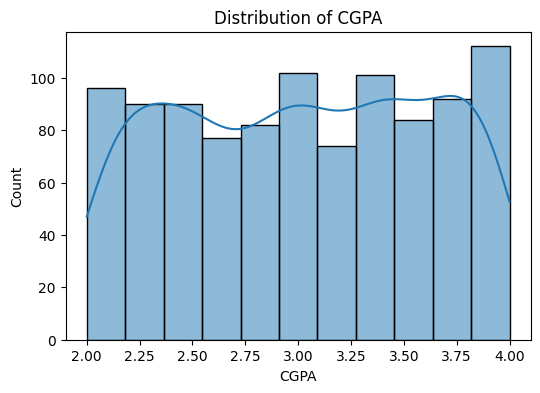

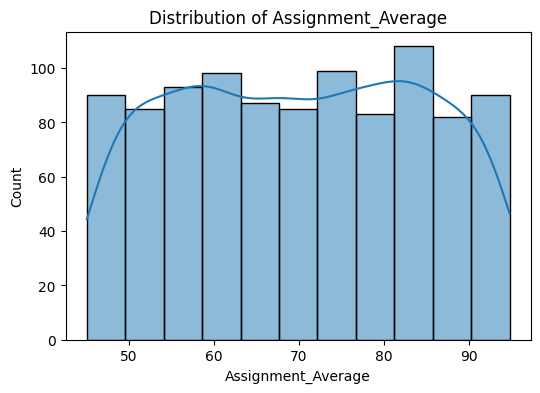

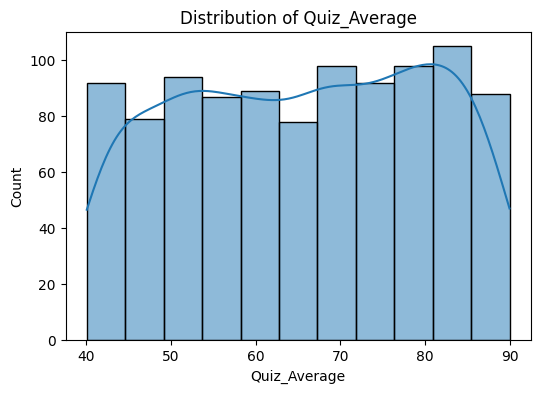

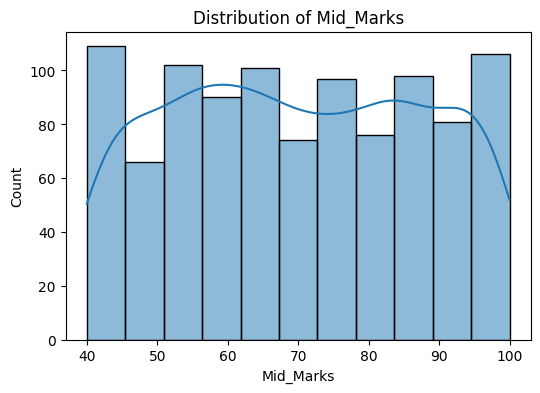

In [50]:
numerical_cols = [
'Attendance_Percentage','Study_Hours_per_Week','CGPA',
'Assignment_Average','Quiz_Average','Mid_Marks'
]


for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


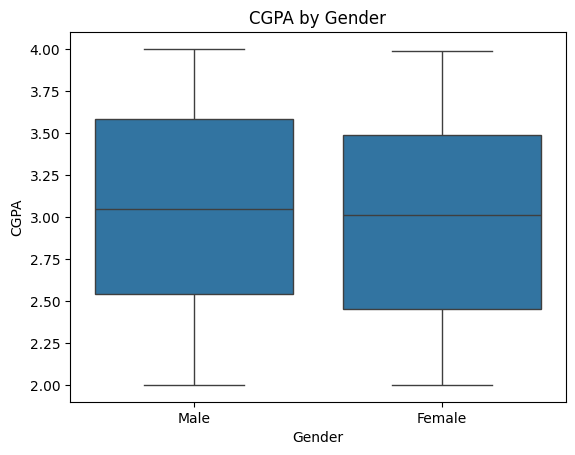

In [51]:
sns.boxplot(x='Gender', y='CGPA', data=df)
plt.title('CGPA by Gender')
plt.show()

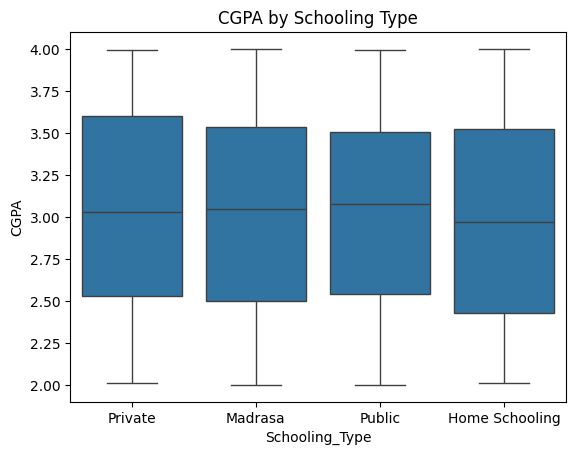

In [52]:
sns.boxplot(x='Schooling_Type', y='CGPA', data=df)
plt.title('CGPA by Schooling Type')
plt.show()

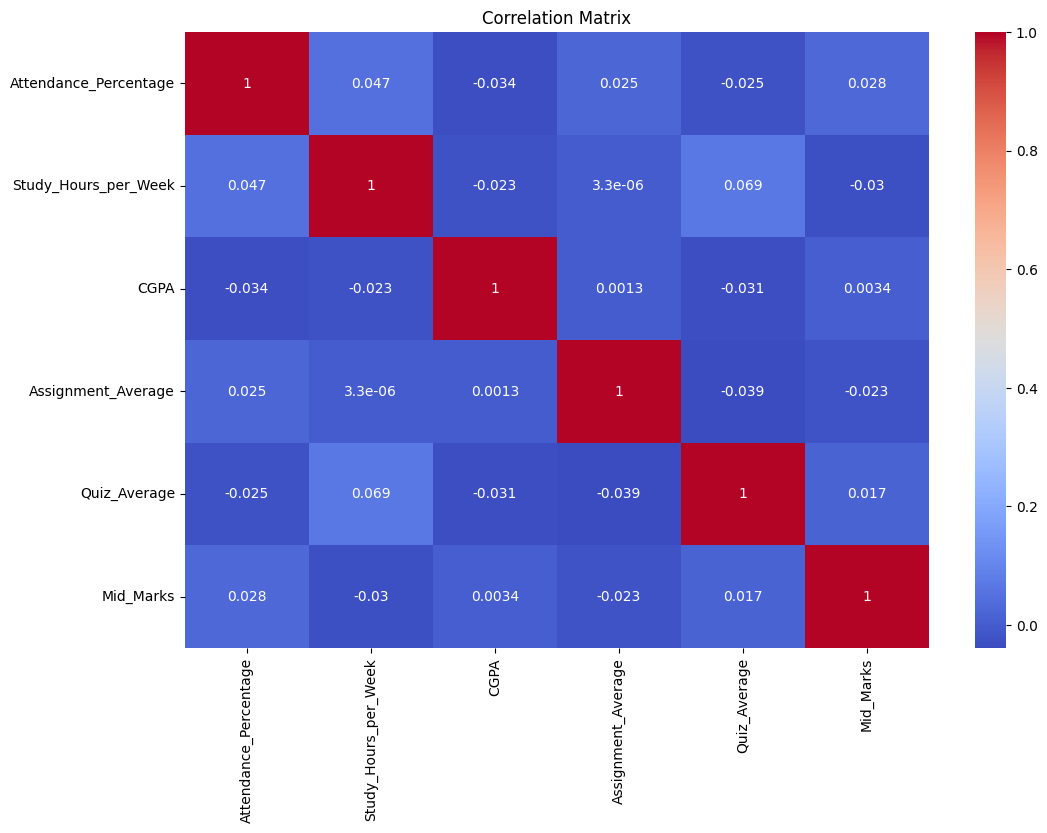

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [54]:
df['Performance_Trend'] = (df['Assignment_Average'] + df['Quiz_Average'] + df['Mid_Marks']) / 3


In [55]:
df['Performance_Trend'].value_counts()

Performance_Trend
58.580000    3
63.033333    2
62.486667    2
73.703333    2
65.760000    2
            ..
65.056667    1
67.863333    1
62.083333    1
83.910000    1
76.166667    1
Name: count, Length: 954, dtype: int64

In [56]:
df.drop_duplicates(inplace=True)

In [57]:
# Fill numerical missing values with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [58]:
# Fill categorical missing values with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [59]:
X = df.drop(['Student_ID','Name','Performance_Trend','Final_Marks','Final_Exam_Status'], axis=1)
y = df['Final_Exam_Status'].map({'Pass': 1, 'Fail': 0})


In [60]:
preprocessor = ColumnTransformer(
transformers=[
('num', StandardScaler(), numerical_cols),
('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
]
)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
log_model = Pipeline(steps=[
('preprocessor', preprocessor),
('classifier', LogisticRegression(max_iter=1000))
])


log_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [63]:
y_pred_log = log_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.52      0.50      0.50       103
           1       0.49      0.51      0.49        97

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score


print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))

Precision: 0.48514851485148514
Recall: 0.5051546391752577
F1 Score: 0.494949494949495


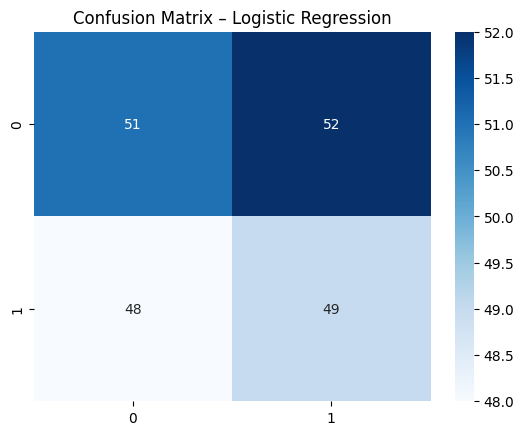

In [65]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix – Logistic Regression')
plt.show()

In [66]:
rf_model = Pipeline(steps=[
('preprocessor', preprocessor),
('classifier', RandomForestClassifier(
n_estimators=300,
random_state=42,
class_weight='balanced'
))
])


rf_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [67]:
y_pred_rf = rf_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.51      0.56      0.54       103
           1       0.48      0.43      0.46        97

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



In [68]:
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Precision: 0.4827586206896552
Recall: 0.4329896907216495
F1 Score: 0.45652173913043476


In [69]:
import pickle


with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(log_model, f)


with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [70]:
feature_names = rf_model.named_steps['preprocessor'].get_feature_names_out()
importances = rf_model.named_steps['classifier'].feature_importances_


importance_df = pd.DataFrame({
'Feature': feature_names,
'Importance': importances
}).sort_values(by='Importance', ascending=False)


importance_df.head(15)

,Feature,Importance
3,num__Assignment_Average,0.090010
2,num__CGPA,0.086923
4,num__Quiz_Average,0.086420
1,num__Study_Hours_per_Week,0.083956
5,num__Mid_Marks,0.081725
0,num__Attendance_Percentage,0.073364
35,cat__Extracurricular_Participation_Multiple Ac...,0.013692
40,cat__School_Medium_English Medium,0.013526
46,cat__Transport_Mode_Own Vehicle,0.013517
47,cat__Transport_Mode_Public Transport,0.013393


In [71]:
def generate_advice(row):
    advice = []


    if row['Attendance_Percentage'] < 75:
        advice.append("Improve attendance consistency")
    if row['Study_Hours_per_Week'] < 10:
        advice.append("Increase weekly study hours")
    if row['Quiz_Average'] < 50:
        advice.append("Weekly quiz revision recommended")
    if row['Internet_Access'] == 'No':
        advice.append("Use campus digital resources")

    return advice


# Example
print(df.apply(generate_advice, axis=1))

0                                                     []
1                     [Weekly quiz revision recommended]
2                                                     []
3      [Improve attendance consistency, Use campus di...
4      [Improve attendance consistency, Increase week...
                             ...                        
995                       [Use campus digital resources]
996    [Improve attendance consistency, Use campus di...
997    [Improve attendance consistency, Use campus di...
998    [Weekly quiz revision recommended, Use campus ...
999                       [Use campus digital resources]
Length: 1000, dtype: object


In [72]:
sample_student = pd.DataFrame([
{
'Gender':'Male',
'District':'Lahore',
'Schooling_Type':'Private',
'Internet_Access':'Yes',
'Parental_Education_Level':'Graduate',
'Scholarship_Status':'No',
'Extracurricular_Participation':'Yes',
'Residence_Type':'Hostel',
'School_Medium':'English',
'Education_System':'Federal',
'Transport_Mode':'Bus',
'Attendance_Percentage':82,
'Study_Hours_per_Week':14,
'Assignment_Average':75,
'Quiz_Average':68,
'Mid_Marks':70,
'Final_Marks':78,
'CGPA':3.1
}
])

In [73]:
print(log_model.predict(sample_student))
print(rf_model.predict(sample_student))

[0]
[1]


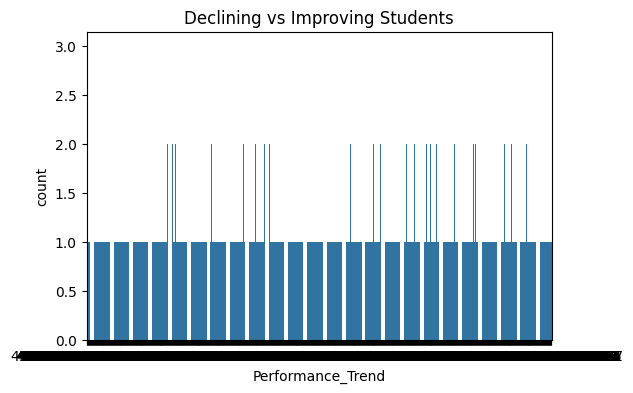

In [74]:
plt.figure(figsize=(6,4))
sns.countplot(x='Performance_Trend', data=df)
plt.title('Declining vs Improving Students')
plt.show()

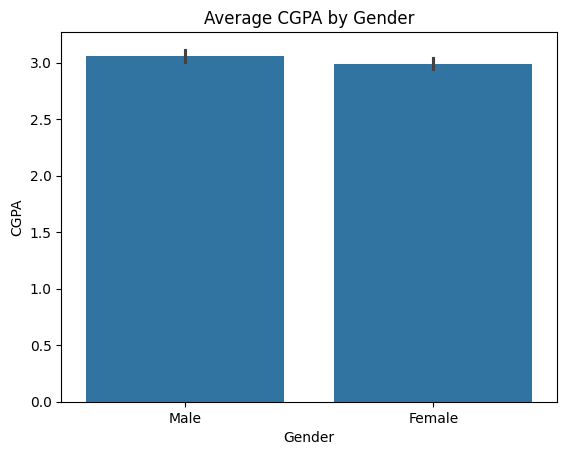

In [75]:
sns.barplot(x='Gender', y='CGPA', data=df)
plt.title('Average CGPA by Gender')
plt.show()

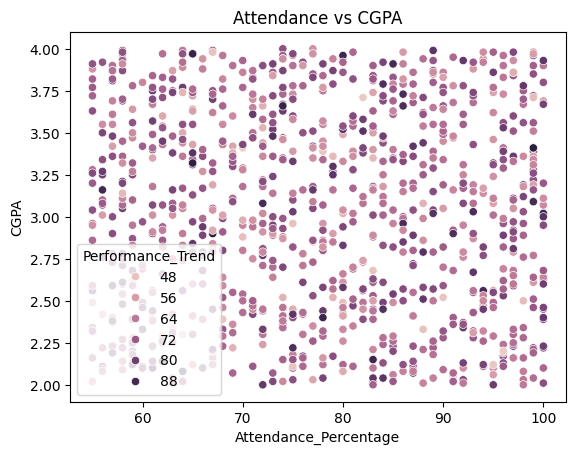

In [76]:
sns.scatterplot(x='Attendance_Percentage', y='CGPA', data=df, hue='Performance_Trend')
plt.title('Attendance vs CGPA')
plt.show()